In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop(labels='Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# statistics about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# number of samples per class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preprocess the data

In [8]:
# check for null values
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<Axes: >

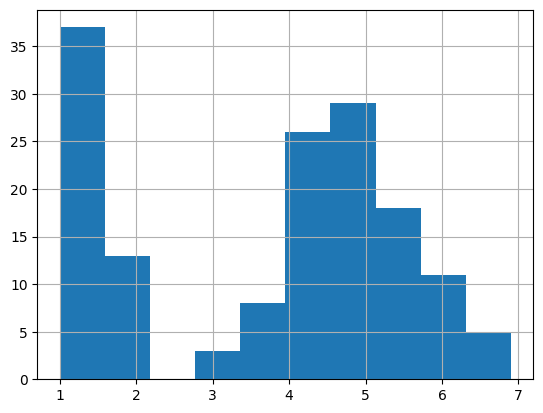

In [ ]:
# histograms
df['PetalLengthCm'].hist()

<Axes: >

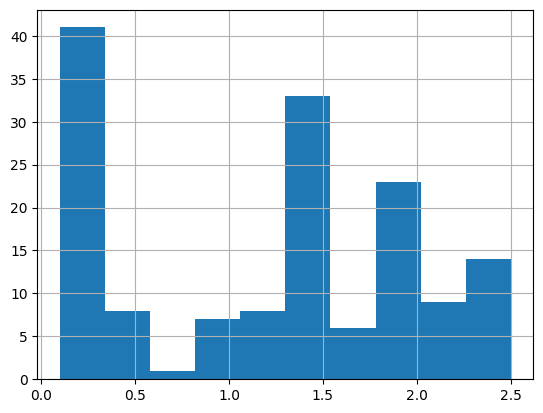

In [10]:
df['PetalWidthCm'].hist()

<Axes: >

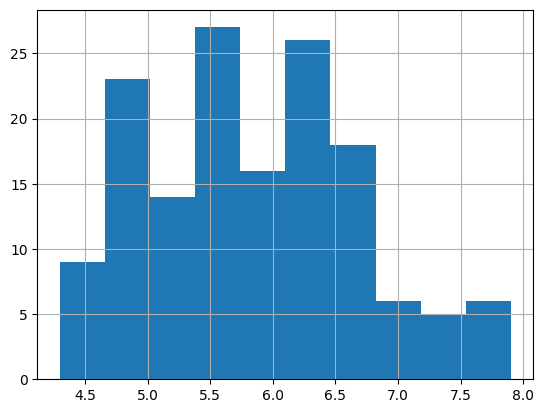

In [11]:
df['SepalLengthCm'].hist()

<Axes: >

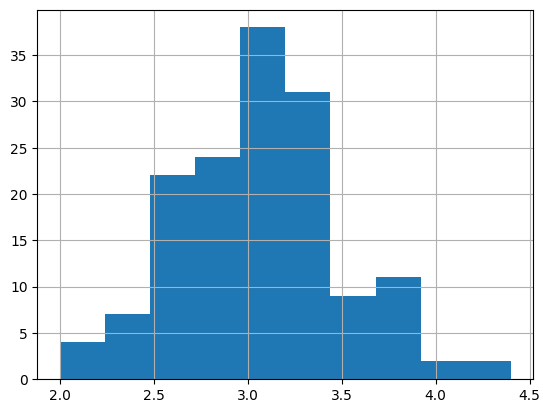

In [12]:
df['SepalWidthCm'].hist()

Text(0, 0.5, 'PetalWidth')

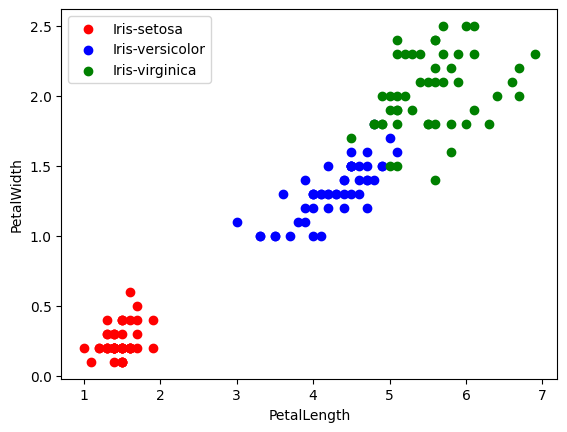

In [15]:
# scatter plot
colors = ['red', 'blue', 'green']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
    x = df[df['Species'] == classes[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=classes[i])
plt.legend()
plt.xlabel("PetalLength")
plt.ylabel("PetalWidth")

Text(0, 0.5, 'SepalWidth')

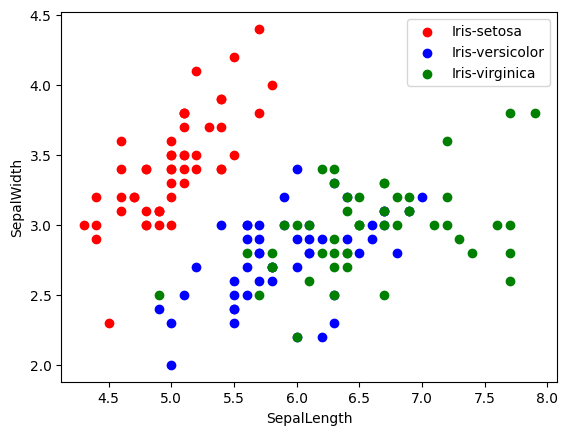

In [16]:
# scatter plot
for i in range(3):
    x = df[df['Species'] == classes[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=classes[i])
plt.legend()
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")

Text(0, 0.5, 'PetalLength')

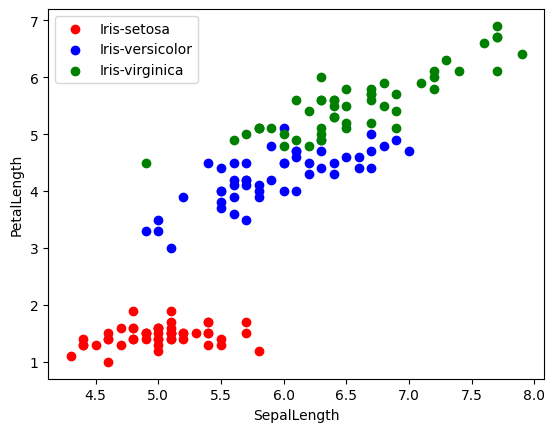

In [17]:
for i in range(3):
    x = df[df['Species'] == classes[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=classes[i])
plt.legend()
plt.xlabel("SepalLength")
plt.ylabel("PetalLength")

Text(0, 0.5, 'PetalWidth')

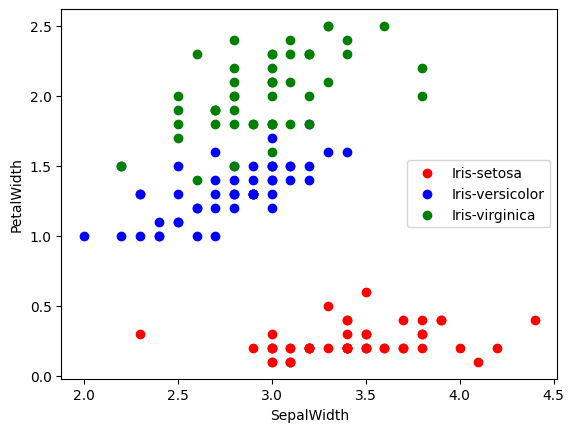

In [18]:
for i in range(3):
    x = df[df['Species'] == classes[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=classes[i])
plt.legend()
plt.xlabel("SepalWidth")
plt.ylabel("PetalWidth")

# Correlation Matrix

In [21]:
df_temp = df.drop(columns=['Species'])
df_temp.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

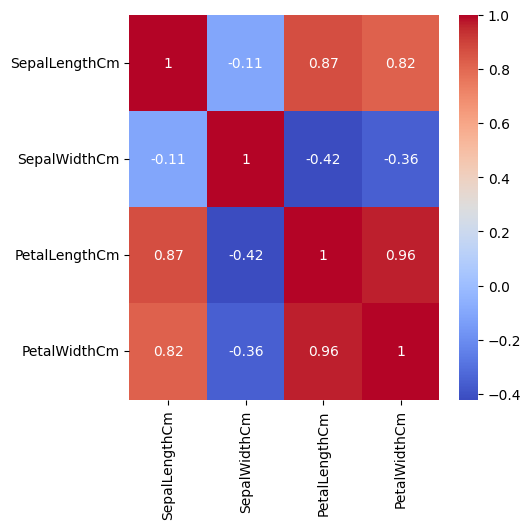

In [26]:
# generating heatmap for correlation
fig, axs = plt.subplots(figsize=(5,5))
sns.heatmap(df_temp.corr(), annot=True, ax=axs, cmap='coolwarm')

# Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# preparing training and test data

In [39]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


# Model Training

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [41]:
print(f"Accuracy: {model.score(x_test, y_test) * 100}%")

Accuracy: 93.47887385811312%


In [42]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [43]:
print(f"Accuracy: {model.score(x_test, y_test) * 100}%")


Accuracy: 91.11111111111111%


In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
print(f"Accuracy: {model.score(x_test, y_test) * 100}%")


Accuracy: 95.55555555555556%
